# Прогнозирование температуры звезды

Вам пришла задача от обсерватории «Небо на ладони»: придумать, как с помощью нейросети определять температуру на поверхности обнаруженных звёзд. 

Обычно для расчёта температуры учёные пользуются следующими методами:
- Закон смещения Вина.
- Закон Стефана-Больцмана.
- Спектральный анализ.

Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.
В базе обсерватории есть характеристики уже изученных 240 звёзд.

Характеристики
- Относительная светимость L/Lo — светимость звезды относительно Солнца.
- Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца.
- Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды.
- Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа.
- Тип звезды - 
    * Коричневый карлик - 0
    * Красный карлик - 1
    * Белый карлик - 2
    * Звёзды главной последовательности - 3
    * Сверхгигант	- 4
    * Гипергигант	- 5.
- Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах.

В этом самостоятельном проекте вам необходимо разработать нейронную сеть, которая поможет предсказывать абсолютную температуру на поверхности звезды.

Справочная информация:
Светимость Солнца (англ. Average Luminosity of Sun)
$$
L_0 = 3.828 * 10^ {26} Вт
$$
Радиус Солнца (англ. Average Radius of Sun)
$$
R_0 = 6.9551 * 10^8 м
$$

**Алгоритм решения задачи**

Шаг 1. Загрузка исходных данных из файла

Шаг 2. Исследовательский анализ
Проведите исследовательский анализ:
- количественных данных,
- категориальных данных.

Обязательно используйте графический анализ и сделайте вывод.

Шаг 3. Подготовка данных к построению модели
1. По результату исследовательского анализа внесите корректировки, если они нужны. Сделайте вывод.
2. Если необходимо, категоризируйте исходные данные.
3. Подготовьте обучающую и тестовую выборки.
4. Проведите масштабирование количественных данных.

Шаг 4. Построение простой модели нейронной сети — baseline
1. Создайте класс для задания архитектуры нейронной сети.
2. Самостоятельно выберите количество скрытых слоёв, количество нейронов на них, функции активации на скрытых и выходном слоях. Попробуйте и сравните несколько подобных комбинаций.
3. Проведите обучение нейронной сети:
    - Создайте функцию для обучения нейронной сети.
    - Проведите обучение модели.
    - Постройте график «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, а по вертикальной — температура в Кельвинах.
4. Сделайте вывод.

Шаг 5. Улучшение сети
- Создайте решение с перебором параметров нейросети. Список параметров для перебора должен включать как минимум «dropout» и «размер батча». Архитектуру нейронной сети: количество слоёв, нейронов, вид функции активации — оставьте как в Baseline, чтобы сравнить результат.
- Проведите обучение нейронной сети. Выведите метрику RMSE и график «Факт — прогноз». Метрика RMSE не должна превышать 4500.
- Сделайте вывод. Желательно оформить его в виде таблицы или графика.

Шаг 6. Выводы по проекту
- Кратко опишите результаты каждого типа модели.
- Напишите выводы сравнения двух моделей.

## Загрузка данных

### Загрузка библиотек

In [1]:
!pip install phik

In [2]:
import warnings

#!pip install pyparsing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

# !pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

RANDOM_STATE=1

### Загрузка данных

In [3]:
try:
    df = pd.read_csv('/datasets/6_class.csv', index_col=0)
except:
    df = pd.read_csv('/Users/vadimprimakov/Documents/Yandex_practicum/CSV/15_stars.csv')
    
display(df.head()) 

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity(L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius(R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude(Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


In [6]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color'],
      dtype='object')

In [7]:
num_cols = ['Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)'] #числовые признаки
cat_cols = ['Star type', 'Star color'] #категориальные признаки
target = ['Temperature (K)'] #целевой признак

**Вывод** 

Данные получены и загружены.<br />
Temperature (K) - температура на поверхности звезды находится в пределах от 2000 градусов (красные звёзды) до 40000 градусов (голубые звезды)<br />
Luminosity(L/Lo) - относительная светимость относительно Солнца достигает 179432 при среднем значении 107188.<br />
Также в данных характеристиках очень большой разброс значений<br />
Стоит проверить значения Star Color на уникальность, использовав графический анализ рассмотреть и другие признаки.<br />

## Предобработка и анализ данных

### Распределение значений количественных признаков

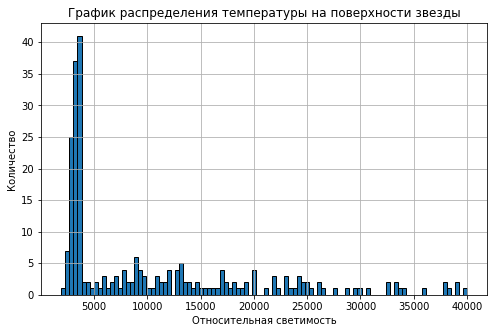

In [8]:
df['Temperature (K)'].hist(bins=100,ec='black', figsize=(8,5))
plt.title('График распределения температуры на поверхности звезды')
plt.xlabel('Относительная светимость')
plt.ylabel('Количество')
plt.show()

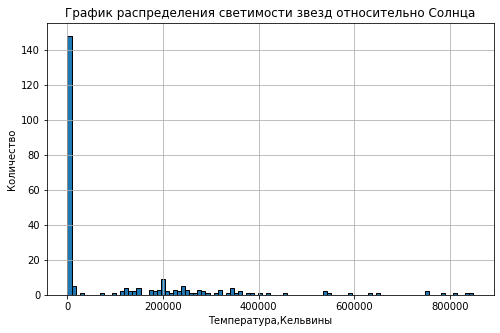

In [9]:
df['Luminosity(L/Lo)'].hist(bins=100,ec='black', figsize=(8,5))
plt.title('График распределения светимости звезд относительно Солнца')
plt.xlabel('Температура,Кельвины')
plt.ylabel('Количество')
plt.show()

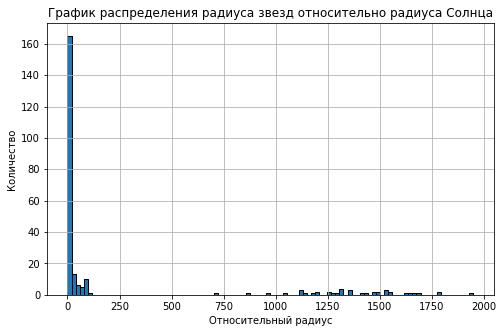

In [10]:
df['Radius(R/Ro)'].hist(bins=100,ec='black', figsize=(8,5))
plt.title('График распределения радиуса звезд относительно радиуса Солнца')
plt.xlabel('Относительный радиус')
plt.ylabel('Количество')
plt.show()

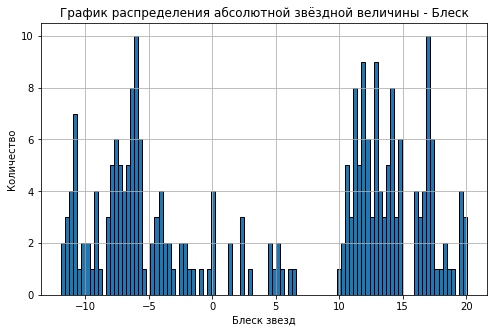

In [11]:
df['Absolute magnitude(Mv)'].hist(bins=100,ec='black', figsize=(8,5))
plt.title('График распределения абсолютной звёздной величины - Блеск')
plt.xlabel('Блеск звезд')
plt.ylabel('Количество')
plt.show()

На первый взгляд, кажется, что никаких аномалий на графиках нет. В данных преобладают звезды с относительно низкими показателями температуры на поверхности, низкой светимостью относительно Солнца и малого радиуса относительно радиуса Солнца. Стоит проверить данные на пропуски и уникальность. <br />

In [12]:
df.isna().sum().to_frame()

,0
Temperature (K),0
Luminosity(L/Lo),0
Radius(R/Ro),0
Absolute magnitude(Mv),0
Star type,0
Star color,0


In [13]:
df.duplicated().sum()

0

Пропуски и дубликаты в данных отсутствуют. <br />

### Проверка значений категориальных признаков

In [14]:
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

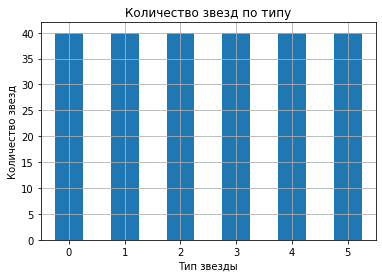

In [15]:
df['Star type'].value_counts().plot(
    kind='bar', title='Количество звезд по типу', grid=True,
    xlabel='Тип звезды', ylabel='Количество звезд', rot=0
);

Типы звезд хорошо представлены. <br />

In [16]:
df['Star color'].unique() 

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [17]:
df['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
white                   3
Blue white              3
Yellowish White         3
Orange                  2
yellowish               2
Whitish                 2
Blue-White              1
Yellowish               1
Orange-Red              1
White-Yellow            1
Blue                    1
Blue white              1
Pale yellow orange      1
Name: Star color, dtype: int64

Цвет звезды, который определяют на основе спектрального анализа состоит из большого количества опечаток, необходимо скорректировать их. <br />

In [18]:
df['Star color'] = df['Star color'].replace({'Blue White': 'Blue-white', 'Blue white':'Blue-white',
                                             'Blue white ':'Blue-white','Blue-White':'Blue-white',
                                             'Blue ':'Blue', 'white':'White', 'yellowish':'Yellow-white',
                                             'yellow-white':'Yellow-white','White-Yellow':'Yellow-white',
                                             'Yellowish White':'Yellow-white','Pale yellow orange':'Pale-yellow-orange',
                                             'Whitish':'White', 'Orange-Red':'Orange',
                                             'Pale yellow orange':'Orange', 'Yellowish':'Yellow-white'})
df['Star color'] = df['Star color'].str.lower()
df['Star color'] = df['Star color'].str.strip(to_strip = None)

In [19]:
df['Star color'].value_counts()

red             112
blue             56
blue-white       41
yellow-white     15
white            12
orange            4
Name: Star color, dtype: int64

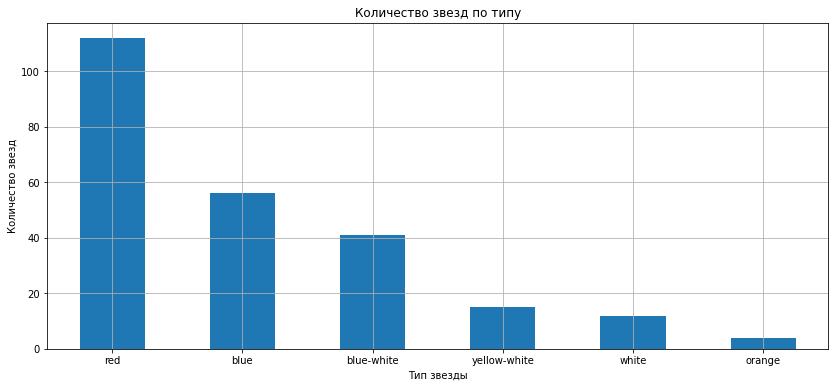

In [20]:
df['Star color'].value_counts().plot(
    kind='bar', title='Количество звезд по типу', grid=True,
    xlabel='Тип звезды', ylabel='Количество звезд', rot=0, figsize=(14, 6)
);

Цвет звезд представлен несбалансировано, в данных преобладают красные, голубые и бело-голубые звезды, скрытые дубликаты исправлены. <br />

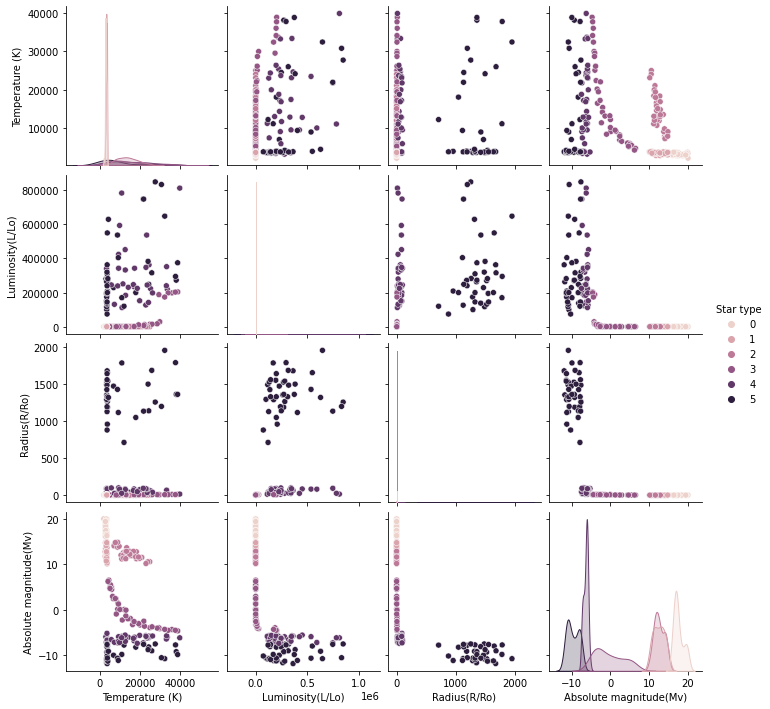

In [21]:
sns.pairplot(df, hue='Star type');

С увеличением температуры начинает уменьшаться абсолютная звёздная величина<br />
При помощи радиуса можно выделить тип звезды<br />
Хорошо выделяются кластеры типа звезды в зависимости абсолютной звёздой величины <br />

Исследуем корреляцию признаков. <br />

interval columns not set, guessing: ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']


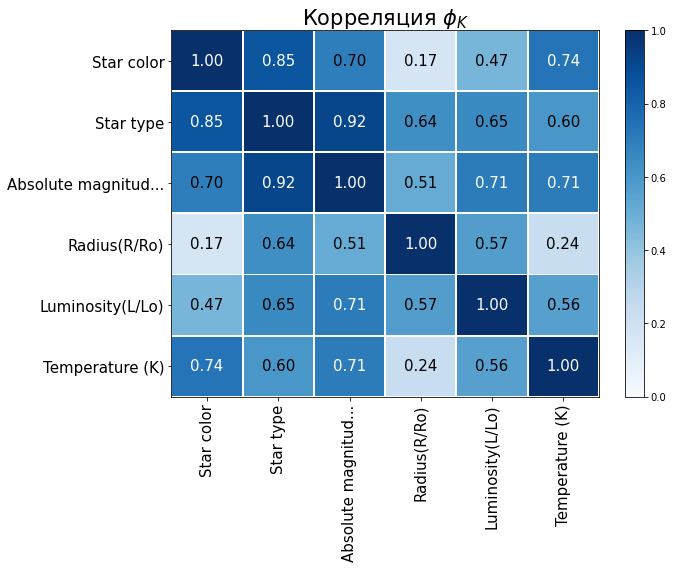

In [22]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"Корреляция $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()
plt.show()

Исследуем статистическую значимость признаков. <br />

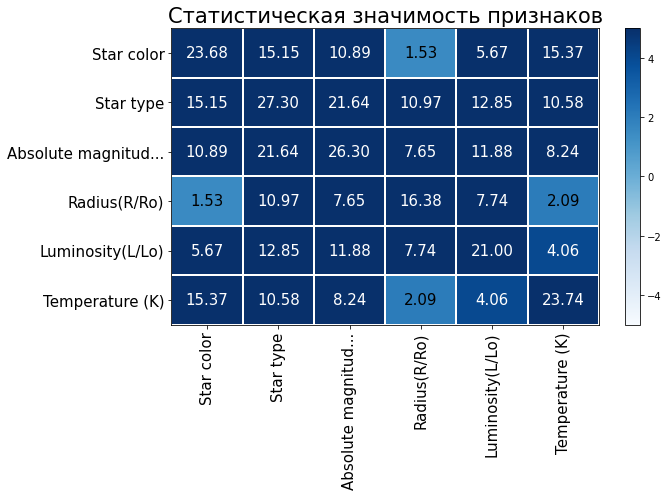

In [23]:
significance_overview = df.significance_matrix(interval_cols=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type'])
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Статистическая значимость признаков", 
                        usetex=False, fontsize_factor=1.5, figsize=(10, 7), color_map="Blues")
plt.tight_layout()

Исследуем корреляцию по целевому признаку. <br />

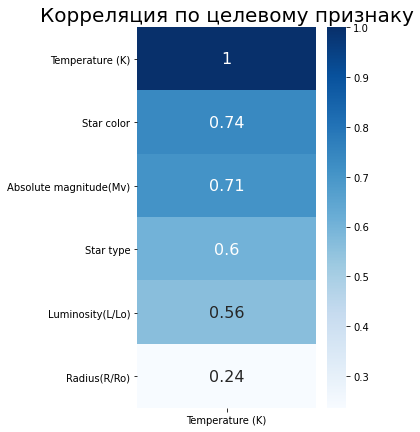

In [24]:
plt.figure(figsize=(4, 7))
sns.heatmap(phik_overview.sort_values(by = 'Temperature (K)', ascending=False)[['Temperature (K)']], cmap='Blues', annot=True, annot_kws={'size':16}, fmt='.2g')
plt.title('Корреляция по целевому признаку', fontsize=20)
plt.show()

Среди признаков замечена мультикорреляция между столбцом Star type и Absolute magnitude(Mv) равная 92%, но удаление одного из данных признаков не представляется возможным, так как они имеют большую статистическую значимость равную 21,63. <br />

Рассмотрим взаимосвязи температуры звезд с признаками:
- Star color - 74% корреляция. Одним из важнейших показателей температуры звезды является его цвет, скорее всего это вызвано приломлением светового луча, который доходит до нашей планеты.
- 'Absolute magnitude(Mv)' - 71% корреляция. Это физическая величина, характеризующая блеск астрономического объекта для наблюдателя, находящегося на некотором стандартном расстоянии от объекта. Использование абсолютной звёздной величины позволяет сравнивать действительную, а не наблюдаемую светимость объектов. Поэтому она очень схожа с понятием относительная светимость.
- Star type - 60% корреляция с таргетом. Всё просто у нас есть пять основных типов звёзд и по ним возможно понять их температуру, с точки зрения статистики и наблюдений.
- 'Luminosity(L/Lo)' - 56% корреляция. В любой статье можно наткнуться на слова о том, что главным фактором температуры звезды является его цвет, но фактически светимость звезды относительно Солнца позволяет нам понять насколько звезда теплая, хоть и не явно. 
- 'Radius(R/Ro)' - самая маленькая корреляция, равная всего 24%. Возможно это связано с природой, а точнее с плотностью и массой звёзд, ведь не важно какой объект будет по размерам, важнее из чего он состоит и каким цветом будет светить. <br />

### Нормализация входных данных

Обработка категориальных данных с помощью OneHotEncoder и масштабирование числовых признаков.<br />

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Temperature (K)', axis = 1),
                                                    df['Temperature (K)'],
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=RANDOM_STATE)
for x,y,z in zip((y_train, y_test),(X_train, X_test), ('тренировочной', 'тестовой')):
    print(f'В {z} выборке, размеры матрицы признаков  = {y.shape}, целевого признака = {x.shape}')

В тренировочной выборке, размеры матрицы признаков  = (192, 5), целевого признака = (192,)
В тестовой выборке, размеры матрицы признаков  = (48, 5), целевого признака = (48,)


In [26]:
for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

In [27]:
col_transformer = ColumnTransformer(
                        transformers=[
                            ('scaler', StandardScaler(), num_cols),
                            ('ohe', OneHotEncoder(sparse=False), cat_cols)],
                                remainder="passthrough"
                                  )

X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [28]:
X_train

array([[-0.58783477, -0.44386275,  1.08158695, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.77876966,  1.96081307, -1.19553388, ...,  1.        ,
         0.        ,  0.        ],
       [-0.58783474, -0.44349897,  0.68515359, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.58783478, -0.4441865 ,  0.84922768, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.54651666,  2.29630317, -1.38900854, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5878271 , -0.44222572, -0.16935948, ...,  0.        ,
         0.        ,  1.        ]])

## Построение базовой нейронной сети

В начале переведём наши данные к тензорам <br />

In [29]:
X_train = torch.FloatTensor(np.array(X_train))
X_test = torch.FloatTensor(np.array(X_test))
y_train = torch.FloatTensor(np.array(y_train))
y_test = torch.FloatTensor(np.array(y_test))

In [30]:
class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
            super(Net, self).__init__()
            
            self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
            self.act1 = nn.ReLU()
            self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
            self.act2 = nn.ReLU()
            self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)

            
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)

        return x

Настраиваем количество нейронов на слоях сети <br />

In [31]:
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 12
n_hidden_neurons_2 = 8
n_out_neurons = 1

In [32]:
net = Net(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
loss = nn.MSELoss()

In [33]:
dataset_train = torch.utils.data.TensorDataset(X_train, y_train)
dataset_test = torch.utils.data.TensorDataset(X_test, y_test)

train_dataloader = DataLoader(dataset_train, batch_size=40, shuffle=True,
                              num_workers=0)
test_dataloader = DataLoader(dataset_test, batch_size=40, num_workers=0)    

In [34]:
class CustomEarlyStopping():
    """
    Ранняя остановка, чтобы остановить тренировку, когда потеря не улучшается после определенной эпохи.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: сколько эпох ждать, прежде чем остановиться, когда потеря не улучшается
        :param min_delta: минимальная разница между loss/метриками, если улучшений нет, то остановим обучение
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [35]:
# Обучим нейросеть
def run_net(net, num_epochs, freq, patience, min_delta):
    early_stopping = CustomEarlyStopping(patience=patience, min_delta=min_delta)
    num_epochs = num_epochs
    for epoch in range(num_epochs):
        net.train()
        for batch in train_dataloader:
            data_train, temperature_train = batch 
            optimizer.zero_grad()

            preds = net.forward(data_train).flatten()
    
            loss_value = torch.sqrt(loss(preds, temperature_train))
            loss_value.backward()
            optimizer.step()
    
        if epoch % freq == 0:
            predicted_temp = [] 
            with torch.no_grad():
                net.eval()
                for batch in test_dataloader:
                    data_test, temperature_test = batch

                    test_preds = net.forward(data_test).flatten()
                    predicted_temp.append(test_preds)
                    RMSE_loss = torch.sqrt(loss(test_preds, temperature_test))

            predicted_temp = torch.cat(predicted_temp).detach().numpy()
            RMSE = mean_squared_error(y_test, predicted_temp, squared=False)
            early_stopping(RMSE)
            if early_stopping.counter == 0:
                best_rmse = RMSE
                best_predicted_temp = predicted_temp
            print(f"epoch:{epoch}, RMSE test: {RMSE}")

            if early_stopping.early_stop:
                print('Early Stoppning!!!')
                print(f'Best RMSE test {best_rmse}')
                break 
    return predicted_temp, y_test, best_rmse

In [36]:
predicted_temp, y_test, best_rmse = run_net(net, 2001, 200, 5, 20)

epoch:0, RMSE test: 15201.16796875
epoch:200, RMSE test: 14809.771484375
epoch:400, RMSE test: 12706.12890625
epoch:600, RMSE test: 9701.404296875
epoch:800, RMSE test: 8112.24560546875
epoch:1000, RMSE test: 7665.84619140625
epoch:1200, RMSE test: 7332.9189453125
epoch:1400, RMSE test: 6971.1796875
epoch:1600, RMSE test: 6622.49267578125
epoch:1800, RMSE test: 6303.2548828125
epoch:2000, RMSE test: 6027.80224609375


Лучшая метрика получилась с оптимизацией методом адаптивной оценки моментов Adaptive Moment Estimation с шагом сходимости в 0.001 и до начала переобучения составила 6027. <br />

Диагностируется переобучение, присутсвует ситуация при которой у модели высокая обобщающая способность на тренировочных данных, но она снижается на тестовых.<br />
Согласно критериям заказчика, метрика RMSE не должна превышать 4500, требуется улучшение сети. Для этого попробуем использовать методы Batch Normalization и Dropout, а также подберем оптимальное количество эпох обучения. <br />
Попробуем визуализировать результаты, построив график «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, а по вертикальной — температура в Кельвинах.<br />

In [37]:
def vizualization(test_preds, y_test, width = 1.0):
    '''Визуализирует предсказания нейронной сети на тестовой выборке'''
    y1 = torch.FloatTensor(test_preds)
    y1 = y1.detach().numpy().reshape([-1])
    y2 = y_test.detach().numpy().reshape([-1])
    x = np.arange(len(y1))
    fig,ax = plt.subplots(figsize=[20,10])
    plt.bar(x, y1, width, color='lightgreen', label = 'Факт')
    plt.bar(x, y2, width=0.5, color='moccasin', label = 'Прогноз')
    ax.set_title('Факт-Прогноз')
    ax.set_xticks(x)
    ax.set_xlabel('Номер звезды в таблице данных')
    ax.set_ylabel('Температура звезды')
    fig.set_figwidth(17)
    fig.set_figheight(10)
    ax.legend();

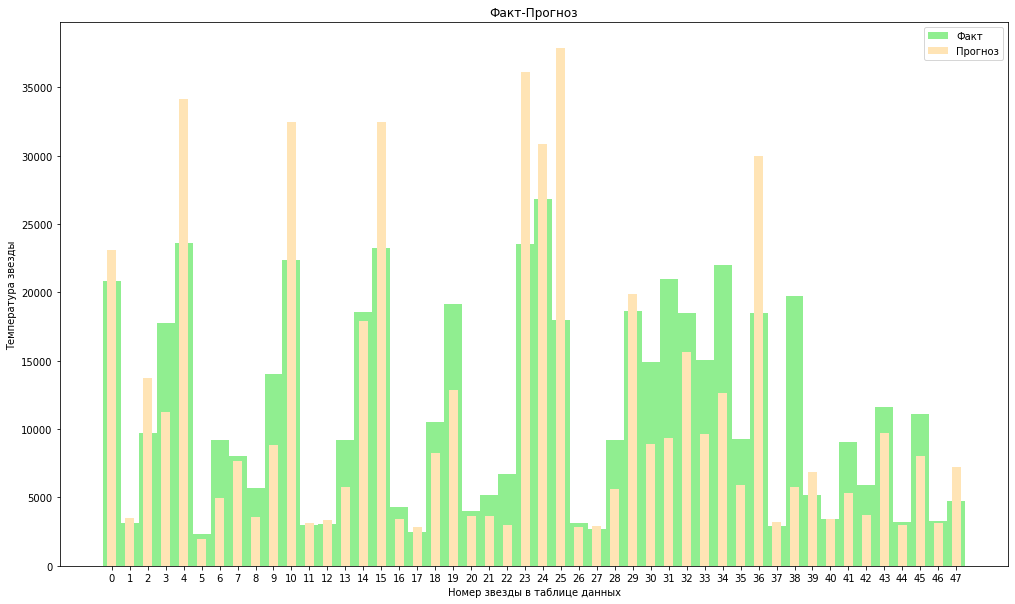

In [38]:
vizualization(predicted_temp, y_test)

**Вывод**

Нейронная сеть очень хорошо предсказывает температуру звёзд у которых температура до 5000 градусов. Но есть и критические расхождения, например, звезды 4, 10, 15, 23, 24, 25, 36.<br />

## Улучшение нейронной сети

Для улучшения нейронной сети попробуем методы Batch Normalization и Dropout, а также подберем оптимальное количество эпох обучения, а также определим лучший оптимизатор и проверим, позволят ли данные методы улучшить нашу нейронную сеть. <br />

In [39]:
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 12
n_hidden_neurons_2 = 8
n_out_neurons = 1

net = Net(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons)
optimizer1 = torch.optim.Adam(net.parameters(), lr=1e-3)
optimizer2 = torch.optim.NAdam(net.parameters(), lr=1e-2)
optimizer3 = torch.optim.Adamax(net.parameters(), lr=1e-2)
optimizer4 = torch.optim.Adamax(net.parameters(), lr=1e-3)
optimizer5 = torch.optim.Adam(net.parameters(), lr=1e-2)

optimizers = [optimizer1, optimizer2, optimizer3, optimizer4, optimizer5]

In [40]:
rmse_optimizers = []
for optimizer in optimizers:
    print(optimizer)
    print()
    predicted_temp, y_test, best_rmse = run_net(net, 100001, 200, 3, 50)
    rmse_optimizers.append(round(best_rmse, 2))

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

epoch:0, RMSE test: 15201.0712890625
epoch:200, RMSE test: 13962.841796875
epoch:400, RMSE test: 9332.689453125
epoch:600, RMSE test: 7768.0087890625
epoch:800, RMSE test: 7240.87109375
epoch:1000, RMSE test: 6708.9736328125
epoch:1200, RMSE test: 6248.30322265625
epoch:1400, RMSE test: 5882.13427734375
epoch:1600, RMSE test: 5629.31787109375
epoch:1800, RMSE test: 5473.41357421875
epoch:2000, RMSE test: 5381.6142578125
epoch:2200, RMSE test: 5322.58056640625
epoch:2400, RMSE test: 5269.8916015625
INFO: Early stopping counter 1 of 3
epoch:2600, RMSE test: 5220.68017578125
epoch:2800, RMSE test: 5175.26416015625
INFO: Early stopping counter 1 of 3
epoch:3000, RMSE test: 5132.68310546875
epoch:3200, RMSE test: 5093.39599609375
INFO: Early stopping counter 1 of 3
epoch:3400, RMSE test: 5064.53955078125
epoch:3600, RMSE test: 5033.95068359375
INFO: Early stopping counter 

In [41]:
optimizers_rmse = pd.DataFrame(data = rmse_optimizers, index = ['Adam, lr: 0.001',
                                                                'NAdam, lr: 0.01',
                                                                'Adamax, lr: 0.01',
                                                                'Adamax, lr: 0.001',
                                                                'Adam, lr: 0.01'], columns = ['RMSE'])
display(optimizers_rmse.sort_values(by='RMSE'))

,RMSE
"NAdam, lr: 0.01",4179.430176
"Adam, lr: 0.01",4206.459961
"Adamax, lr: 0.01",4224.149902
"Adamax, lr: 0.001",4268.229980
"Adam, lr: 0.001",4899.240234


Попробуем метод Dropout на разных слоях, проверим, позволит ли это улучшить нашу нейронную сеть. <br />

In [42]:
rmse_dropouts = [4205, 3923, 4007, 4035, 4197, 4010, 3996, 3943]
dropouts_rmse = pd.DataFrame(data = rmse_dropouts, index = ['Dropout, dp1: 0.7',
                                                                'Dropout, dp1: 0.5',
                                                                'Dropout, dp1: 0.2',
                                                                'Dropout, dp1: 0.1',
                                                                'Dropout, dp1: 0.5, dp2: 0.4',
                                                                'Dropout, dp1: 0.5, dp2: 0.3',
                                                                'Dropout, dp1: 0.5, dp2: 0.2',
                                                                'Dropout, dp1: 0.5, dp2: 0.1',
                                                               ], columns = ['RMSE'])
display(dropouts_rmse.sort_values(by='RMSE'))

,RMSE
"Dropout, dp1: 0.5",3923
"Dropout, dp1: 0.5, dp2: 0.1",3943
"Dropout, dp1: 0.5, dp2: 0.2",3996
"Dropout, dp1: 0.2",4007
"Dropout, dp1: 0.5, dp2: 0.3",4010
"Dropout, dp1: 0.1",4035
"Dropout, dp1: 0.5, dp2: 0.4",4197
"Dropout, dp1: 0.7",4205


Лучший результат по скорости и метрике получилось достичь используя метод Dropout после первого слоя со значением 0.5. <br />

In [43]:
# Добавим регуляризацию на лучшем оптимизаторе NAdam, lr: 0.01 и метод Dropout после первого скрытого слоя (0.5)

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
            super(Net, self).__init__()
            
            self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
            self.bn1 = nn.BatchNorm1d(n_hidden_neurons_1)
            self.act1 = nn.ReLU()
            self.dp1 = nn.Dropout(p=0.5)
            self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
            self.bn2 = nn.BatchNorm1d(n_hidden_neurons_2)
            self.act2 = nn.ReLU()
            #self.dp2 = nn.Dropout(p=0.1)
            self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
            
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act2(x)
        #x = self.dp2(x)
        x = self.fc3(x)
        
        return x

In [44]:
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 12
n_hidden_neurons_2 = 8
n_out_neurons = 1

net = Net(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons)
optimizer = torch.optim.NAdam(net.parameters(), lr=1e-2)
loss = nn.MSELoss()

In [45]:
dataset_train = torch.utils.data.TensorDataset(X_train, y_train)
dataset_test = torch.utils.data.TensorDataset(X_test, y_test)

train_dataloader = DataLoader(dataset_train, batch_size=40, shuffle=True,
                              num_workers=0)
test_dataloader = DataLoader(dataset_test, batch_size=40, num_workers=0) 

In [46]:
# Обучим нейросеть
early_stopping = CustomEarlyStopping(patience=10, min_delta=20)

num_epochs = 2001
val_loss = []
train_loss = []

for epoch in range(num_epochs):
    net.train()
    train_loss_batches = []
    for batch in train_dataloader:
        data_train, temperature_train = batch 
        optimizer.zero_grad()

        preds = net.forward(data_train).flatten()

        loss_value = torch.sqrt(loss(preds, temperature_train))
        
        loss_value.backward()
        optimizer.step()
        
        loss_value = loss_value.detach().numpy().reshape([-1])
        train_loss_batches.append(loss_value)
    
        
    if epoch % 50 == 0:
        predicted_temp = [] 
        with torch.no_grad():
            net.eval()
            for batch in test_dataloader:
                data_test, temperature_test = batch

                test_preds = net.forward(data_test).flatten()
                predicted_temp.append(test_preds)
                RMSE_loss = torch.sqrt(loss(test_preds, temperature_test))

        predicted_temp = torch.cat(predicted_temp).detach().numpy()
        RMSE = mean_squared_error(y_test, predicted_temp, squared=False)
        
        
        early_stopping(RMSE)
        if early_stopping.counter == 0:
            best_rmse = RMSE
            best_predicted_temp = predicted_temp
            val_loss.append(best_rmse)
            train_loss.append(np.mean(train_loss_batches))
        print(f"epoch:{epoch}, RMSE test: {RMSE}")
        
        
        if early_stopping.early_stop:
            print('Early Stoppning!!!')
            print(f'Best RMSE test {best_rmse}')
            break 

epoch:0, RMSE test: 15201.138671875
epoch:50, RMSE test: 14990.1572265625
epoch:100, RMSE test: 14280.18359375
epoch:150, RMSE test: 13136.2724609375
epoch:200, RMSE test: 12008.4033203125
epoch:250, RMSE test: 10235.1953125
epoch:300, RMSE test: 8810.669921875
epoch:350, RMSE test: 6449.06201171875
epoch:400, RMSE test: 5688.8603515625
epoch:450, RMSE test: 4728.11083984375
epoch:500, RMSE test: 4112.5517578125
epoch:550, RMSE test: 4089.970703125
INFO: Early stopping counter 1 of 10
epoch:600, RMSE test: 4102.51611328125
INFO: Early stopping counter 2 of 10
epoch:650, RMSE test: 4129.17724609375
epoch:700, RMSE test: 4011.020751953125
INFO: Early stopping counter 1 of 10
epoch:750, RMSE test: 4013.358642578125
INFO: Early stopping counter 2 of 10
epoch:800, RMSE test: 4148.98486328125
INFO: Early stopping counter 3 of 10
epoch:850, RMSE test: 4112.775390625
INFO: Early stopping counter 4 of 10
epoch:900, RMSE test: 4231.57763671875
INFO: Early stopping counter 5 of 10
epoch:950, RMSE

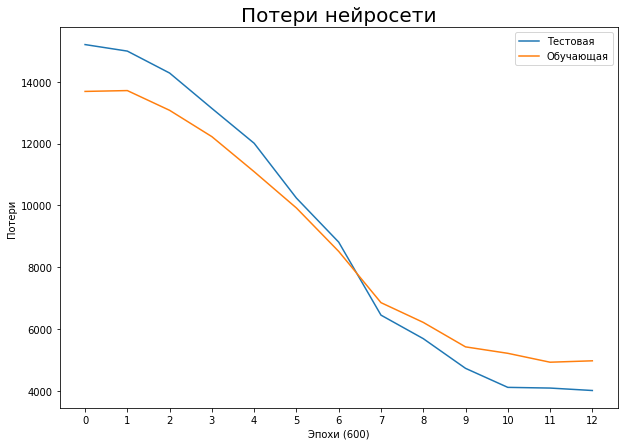

In [47]:
x = np.arange(len(val_loss))

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)
ax.set_xticks(x)
val = ax.plot(x, val_loss, label = 'Тестовая')
train = ax.plot(x, train_loss, label = 'Обучающая')
ax.legend()
ax.set_title('Потери нейросети', fontsize=20)
ax.set_xlabel('Эпохи (600)')
ax.set_ylabel('Потери')
plt.show()

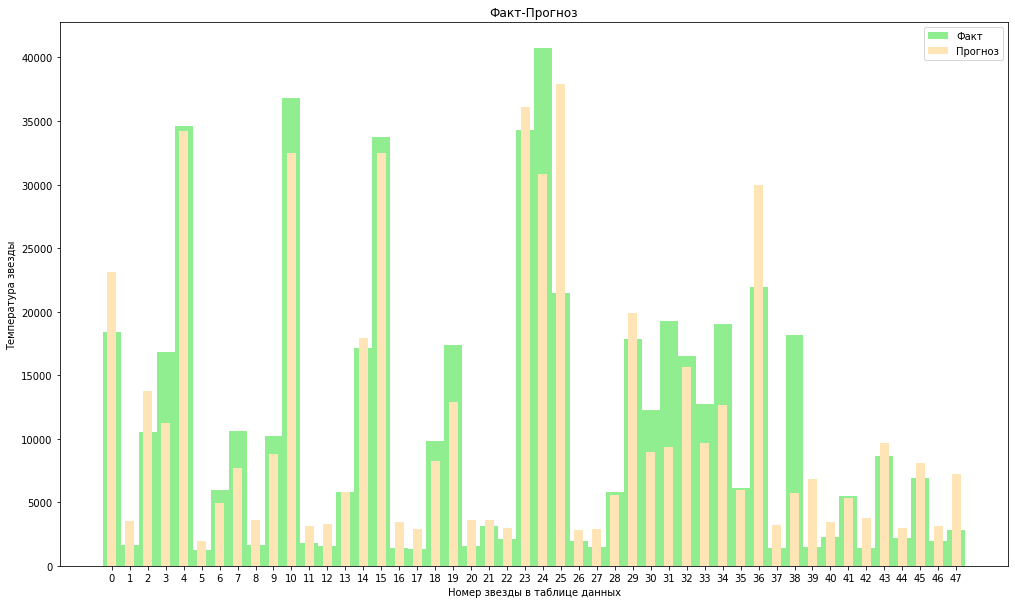

In [48]:
vizualization(predicted_temp, y_test)

После проведенного перебора оптимизаторов - выявлено, что с данной задачей лучше всего справляется Adamax, lr: 0.01, не учитывая скорости алгоритмов, только по конечной RMSE. <br />

На лучшем оптимитизаторе проведено конечное улучшение модели: добавили dropout равный 50% и регуляризацию весов BatchNorm1d на первый скрытый слой. На второй скрытый слой регуляризацию весов BatchNorm1d. Время обучения увеличилось, однако это способстовало улучшению метрики. <br />

Конечная метрика RMSE составила около 4000. Если посмотреть на график потерь нашей последней нейросети, то можно увидеть, что модель обучилась качественно, без недо- и переобучений, благодаря ранней остановке. График факт-прогноз похож на график базовой модели, однако можем увидеть, что начал предсказывать лучше до 15000 и свыше 30000 градусов по Кельвину, но стал хуже справляться со звездами до 5000 градусов. <br />

## Выводы

В ходе исследования была построеная базовая модель Нейронной сети для предсказания абсолютной температуры на поверхности звезды.

Базовая модель была построена с параметрами:

- n_in_neurons = 15
- n_hidden_neurons_1 = 12
- n_hidden_neurons_2 = 8
- n_out_neurons = 1
- optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
- loss = nn.MSELoss()
- batch_size = 40
- num_epochs < 2000
- выходная функция после первого и второго скрытого слоя - ReLU

Данная модель оказалась недостаточно эффективна и легко переобучалась. Метрика RMSE получилась > 5 тыс, что нас не удовлетворяло, так ка согласно критериям заказчика, метрика RMSE не должна превышать 4500, потребовалось улучшение сети.

Улучшенная модель

Для улучшения нейронной сети попробовали методы Batch Normalization и Dropout, а также подбор оптимального количества эпох обучения, а также определили лучший оптимизатор
- n_in_neurons = 15
- n_hidden_neurons_1 = 12
- n_hidden_neurons_2 = 8
- n_out_neurons = 1
- optimizer = torch.optim.NAdam(net.parameters(), lr=1e-2)
- loss = nn.MSELoss()
- batch_size = 40
- num_epochs < 2000
- bn1 = nn.BatchNorm1d(n_hidden_neurons_1)
- dp1 = nn.Dropout(p=0.5)
- bn2 = nn.BatchNorm1d(n_hidden_neurons_2)
- выходная функция после первого и второго скрытого слоя - ReLU

Данную модель можно считать эффективной. Метрика RMSE получилась близка к 4000.

Сравнивая два графика, можно явно увидеть как плохо обучалась базовая модель (как много делала ошибок) и насколько лучше стала предсказывать после улучшения. <br />